# Credit Card Fraud Detection 🛡️💳


This project aims to detect fraudulent credit card transactions using machine learning techniques. 
We will preprocess the data, explore it, build models, and evaluate their performance.

**Goals:**
1. Preprocess the data.
2. Explore the data using visualizations.
3. Engineer features to improve model performance.
4. Build and evaluate multiple machine learning models.
5. Select the best model for fraud detection.

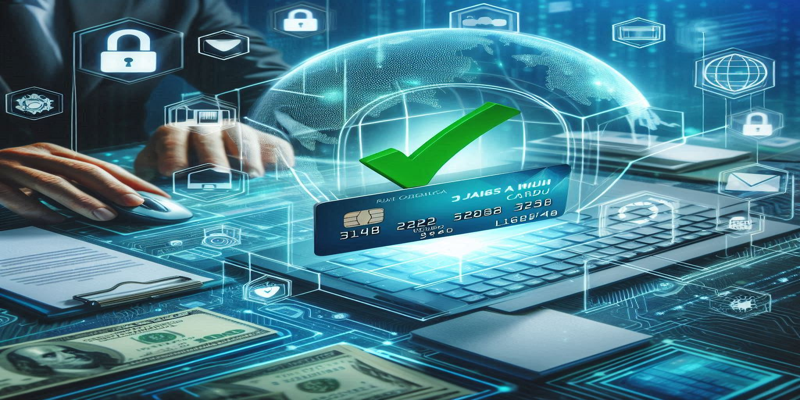

In [4]:
from PIL import Image
from IPython.display import display
display(Image.open('img.png').resize((800, 400)) or Image.open('img.png'))

In [5]:
import pandas as pd

In [6]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)


 Load the datasets

In [7]:
train_data = pd.read_csv('FraudTrain.csv')
test_data = pd.read_csv('FraudTest.csv')

Display the first few rows of the datasets

In [8]:
train_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
test_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [10]:
train_data.columns  

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
train_data.shape[0]

1296675

In [13]:
test_data.shape[0]

555719

In [14]:
fraud = train_data[train_data["is_fraud"] == 1]
not_fraud =  train_data[train_data["is_fraud"] == 0]
print("Number of fraud case:",fraud.shape[0])
print("Number of non-fraudulent case:",not_fraud.shape[0])

Number of fraud case: 7506
Number of non-fraudulent case: 1289169


Data Preprocessing

`Handling missing values`

`Encoding categorical variables`

`Scaling numerical variables`

`Feature extraction`


In [15]:
# Check for missing values
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [16]:
print(test_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [17]:
train_data.duplicated().sum()

0

In [18]:
test_data.duplicated().sum()

0

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

Convert date columns to datetime

In [20]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

 Extract useful features from date

In [21]:

train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day
train_data['transaction_hour'] = train_data['trans_date_trans_time'].dt.hour


In [22]:

test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day
test_data['transaction_hour'] = test_data['trans_date_trans_time'].dt.hour


 Identify categorical and numerical columns in the training data

In [23]:


categorical_cols_train = train_data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_train = train_data.select_dtypes(include=['number']).columns.tolist()


 Identify categorical and numerical columns in the test data

In [24]:

categorical_cols_test = test_data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test = test_data.select_dtypes(include=['number']).columns.tolist()


 Print the categorical and numerical columns

In [25]:

print("Categorical columns in training data:", categorical_cols_train)
print("Numerical columns in training data:", numerical_cols_train)


Categorical columns in training data: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
Numerical columns in training data: ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transaction_month', 'transaction_day', 'transaction_hour']


In [26]:

print("Categorical columns in test data:", categorical_cols_test)
print("Numerical columns in test data:", numerical_cols_test)


Categorical columns in test data: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
Numerical columns in test data: ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transaction_month', 'transaction_day', 'transaction_hour']


 Encode categorical variables

In [27]:

label_encoder = LabelEncoder()
categorical_cols = ['category', 'merchant', 'gender']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])


 Scale numerical variables

In [28]:

scaler = StandardScaler()
num_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])


 Drop unnecessary columns

In [29]:

cols_to_drop = ['Unnamed: 0','trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time']
train_data = train_data.drop(columns=cols_to_drop)
test_data = test_data.drop(columns=cols_to_drop)


In [30]:
train_data.columns  

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'transaction_month',
       'transaction_day', 'transaction_hour'],
      dtype='object')

In [31]:
test_data.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'transaction_month',
       'transaction_day', 'transaction_hour'],
      dtype='object')

Exploratory Data Analysis (EDA)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

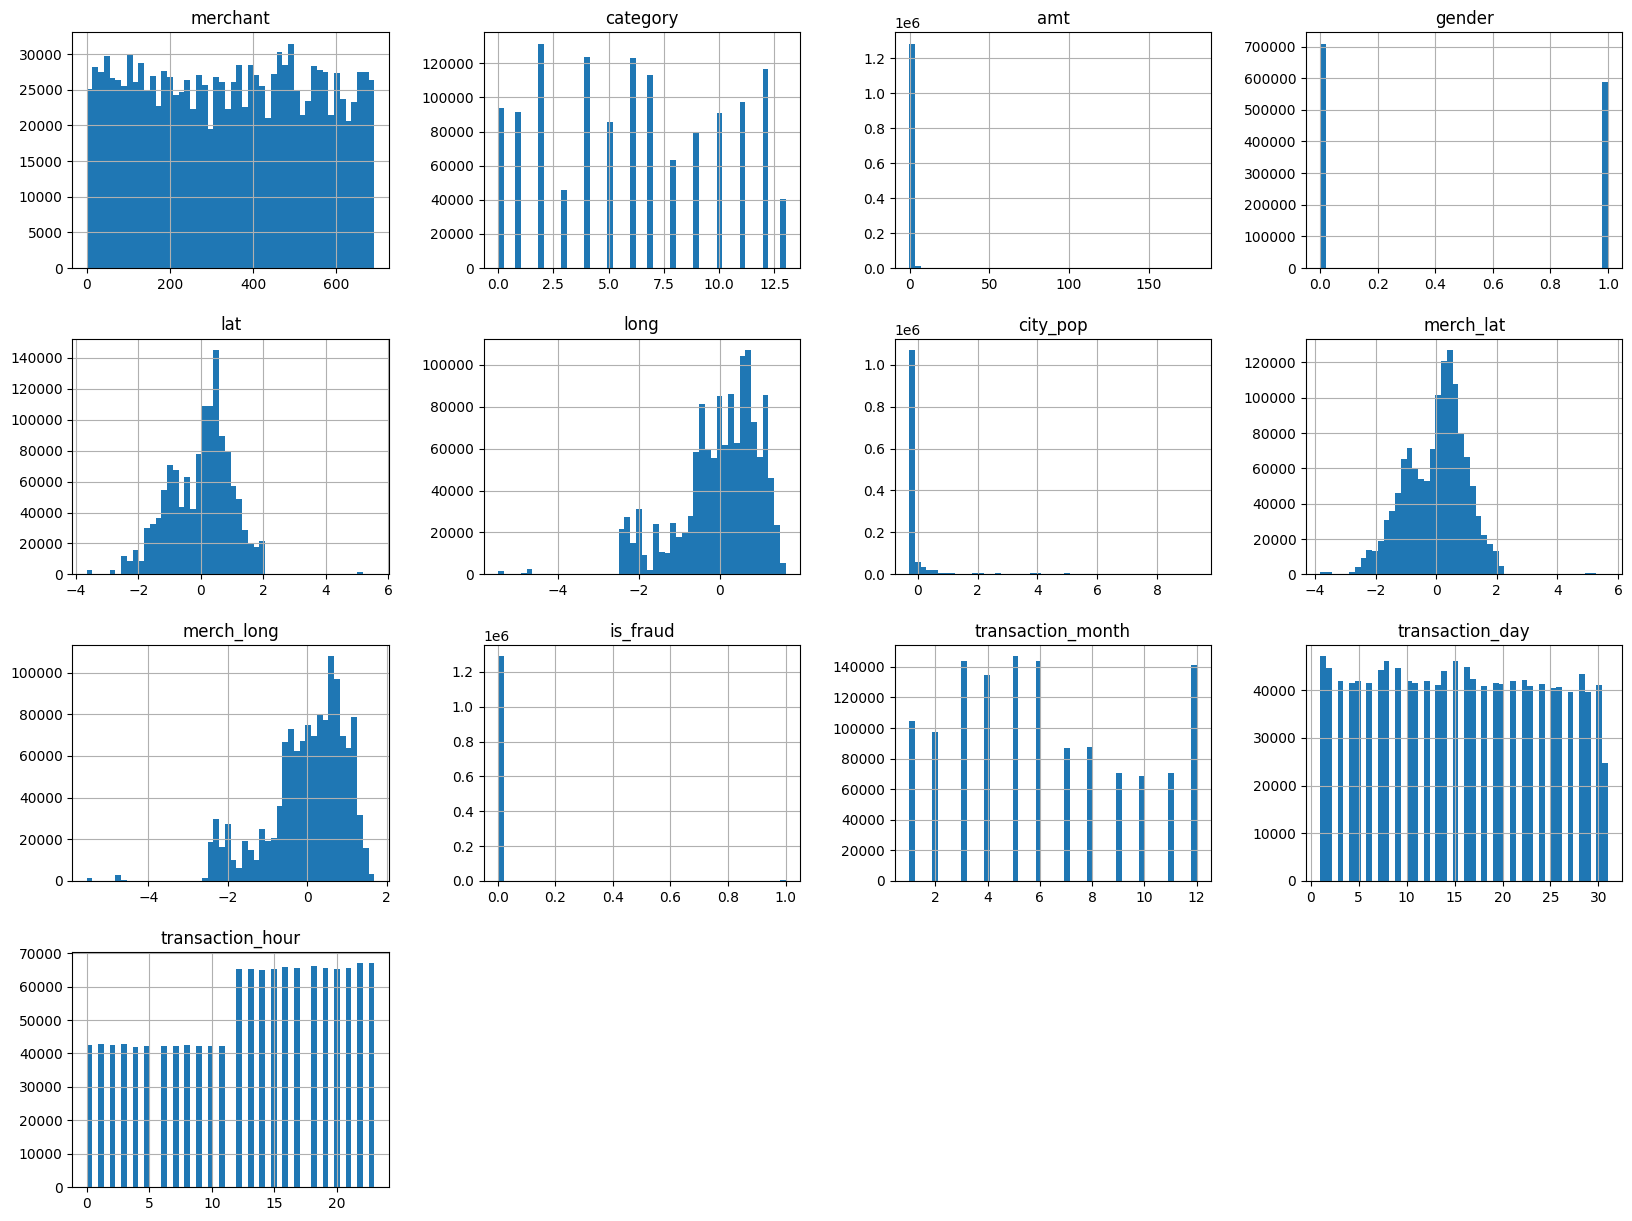

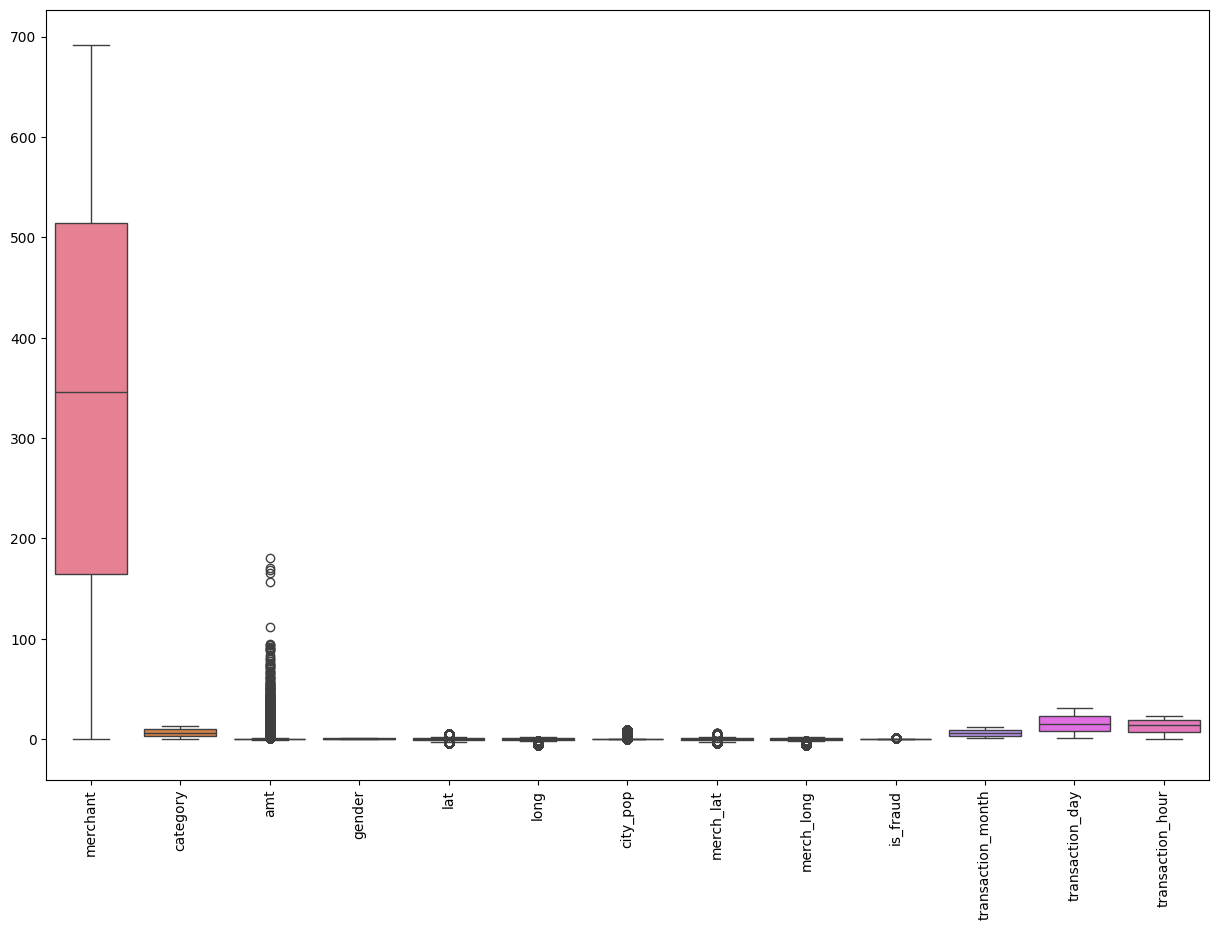

In [33]:
# Histograms
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.show()


 Display information about the dataset

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   merchant           1296675 non-null  int32  
 1   category           1296675 non-null  int32  
 2   amt                1296675 non-null  float64
 3   gender             1296675 non-null  int32  
 4   lat                1296675 non-null  float64
 5   long               1296675 non-null  float64
 6   city_pop           1296675 non-null  float64
 7   merch_lat          1296675 non-null  float64
 8   merch_long         1296675 non-null  float64
 9   is_fraud           1296675 non-null  int64  
 10  transaction_month  1296675 non-null  int32  
 11  transaction_day    1296675 non-null  int32  
 12  transaction_hour   1296675 non-null  int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 98.9 MB


Display summary statistics

In [35]:

train_data.describe()


,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,transaction_month,transaction_day,transaction_hour
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,3.428585e+02,6.227787e+00,-9.447052e-18,4.525513e-01,-3.796575e-16,-4.366253e-15,-1.350753e-18,8.127753e-16,9.710216e-16,5.788652e-03,6.142150e+00,1.558798e+01,1.280486e+01
std,2.009519e+02,3.913443e+00,1.000000e+00,4.977437e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.586269e-02,3.417703e+00,8.829121e+00,6.817824e+00
min,0.000000e+00,0.000000e+00,-4.325897e-01,0.000000e+00,-3.646814e+00,-5.483362e+00,-2.940871e-01,-3.818076e+00,-5.551108e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.650000e+02,3.000000e+00,-3.786337e-01,0.000000e+00,-7.717240e-01,-4.776241e-01,-2.917027e-01,-7.444080e-01,-4.844070e-01,0.000000e+00,3.000000e+00,8.000000e+00,7.000000e+00
50%,3.460000e+02,6.000000e+00,-1.424127e-01,0.000000e+00,1.608963e-01,1.998271e-01,-2.860297e-01,1.621089e-01,2.024585e-01,0.000000e+00,6.000000e+00,1.500000e+01,1.400000e+01
75%,5.140000e+02,1.000000e+01,7.977349e-02,1.000000e+00,6.703917e-01,7.317598e-01,-2.268423e-01,6.692698e-01,7.254089e-01,0.000000e+00,9.000000e+00,2.300000e+01,1.900000e+01
max,6.920000e+02,1.300000e+01,1.801352e+02,1.000000e+00,5.547035e+00,1.619007e+00,9.332066e+00,5.670086e+00,1.690176e+00,1.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


Plot the distribution of the target variable

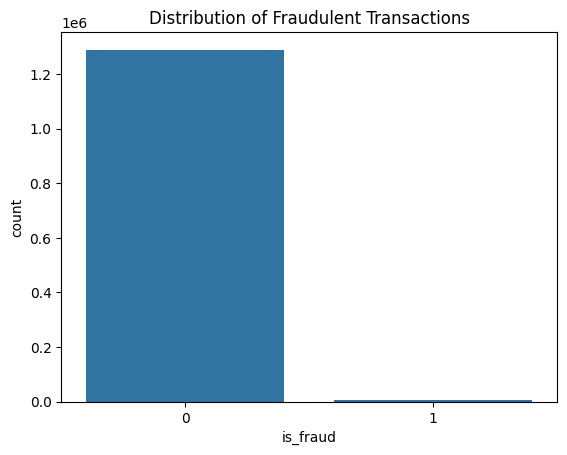

In [37]:

sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()


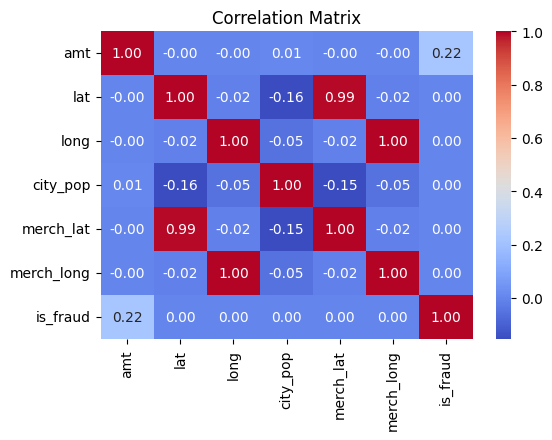

In [38]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Total Transactions by Gender

Fraudulent Transactions by Gender

Fraud Rate by Gender


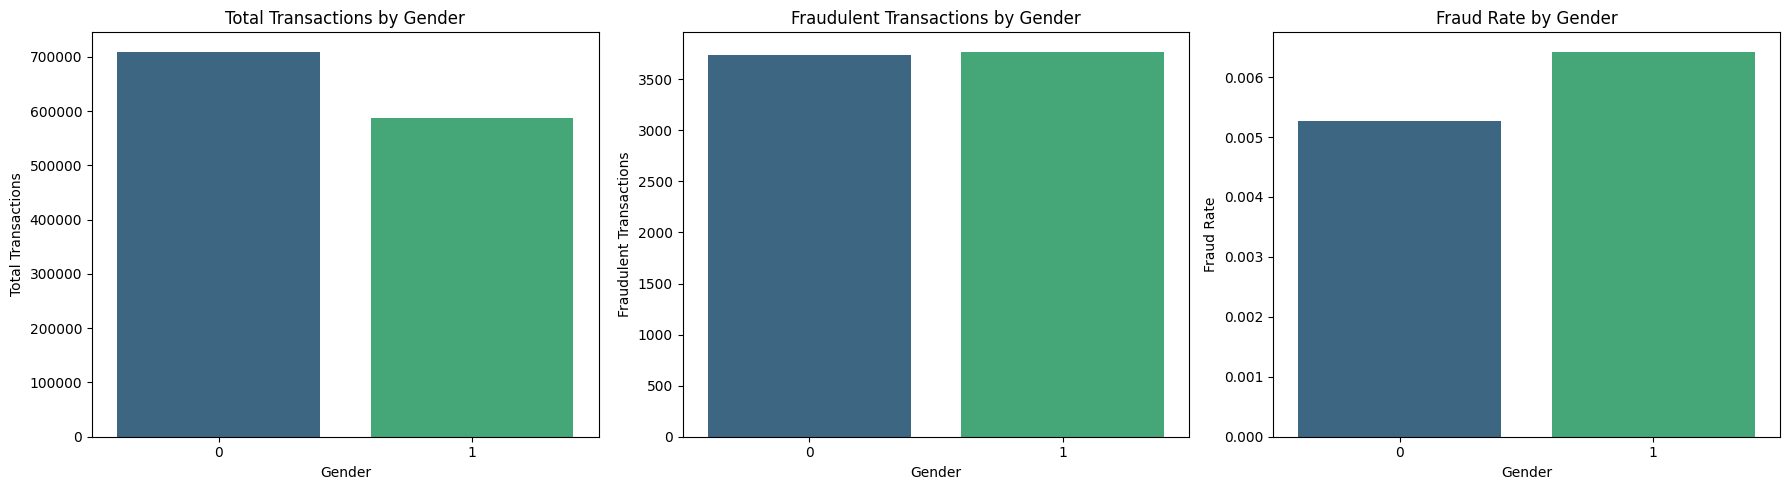

In [39]:

gender_stats = train_data.groupby('gender')['is_fraud'].agg(['count', 'sum', 'mean']).rename(columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions', 'mean': 'Fraud Rate'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total Transactions
sns.barplot(x=gender_stats.index, y=gender_stats['Total Transactions'], ax=axes[0], palette='viridis')
axes[0].set_title('Total Transactions by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Transactions')

# Fraudulent Transactions
sns.barplot(x=gender_stats.index, y=gender_stats['Fraudulent Transactions'], ax=axes[1], palette='viridis')
axes[1].set_title('Fraudulent Transactions by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Fraudulent Transactions')

# Fraud Rate
sns.barplot(x=gender_stats.index, y=gender_stats['Fraud Rate'], ax=axes[2], palette='viridis')
axes[2].set_title('Fraud Rate by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Fraud Rate')

plt.tight_layout()
plt.show()


Split the data

In [40]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns='is_fraud')
y = train_data['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,accuracy_score

 Train:
 - logistic regression model

In [42]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
y_pred = model.predict(X_val)

In [44]:

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335


Confusion Matrix:
[[257672    143]
 [  1520      0]]

ROC-AUC Score:
0.4997226693559335


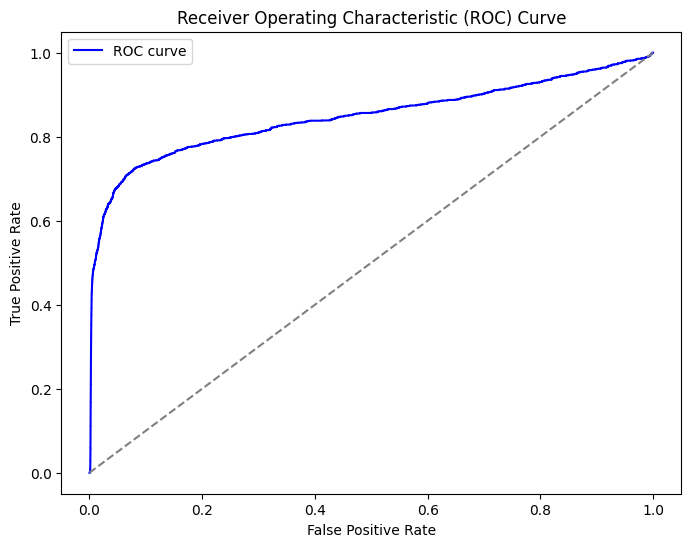

In [45]:
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Analysis:

Accuracy: The model has a high accuracy of approximately 99.39%. However, accuracy is not a reliable metric in this case due to the severe class imbalance.

- Precision, Recall, F1-Score for Class 0 (Non-Fraudulent):
Precision: 0.99
Recall: 1.00
F1-Score: 1.00
These metrics are very high for the non-fraudulent class, indicating that the model is very effective at identifying non-fraudulent transactions.

- Precision, Recall, F1-Score for Class 1 (Fraudulent):
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
These metrics are all zero for the fraudulent class, indicating that the model is failing to identify any fraudulent transactions. This is a critical issue as the primary goal is to detect fraud.
Confusion Matrix:

- True Negatives (Non-Fraudulent transactions correctly identified): 257,672
- False Positives (Non-Fraudulent transactions incorrectly identified as Fraudulent): 143
- False Negatives (Fraudulent transactions incorrectly identified as Non-Fraudulent): 1,520
- True Positives (Fraudulent transactions correctly identified): 0
The confusion matrix shows that the model almost always predicts non-fraudulent transactions and fails to correctly predict fraudulent transactions.
- ROC-AUC Score: The ROC-AUC score of 0.4997 indicates that the model performs no better than random guessing for distinguishing between fraudulent and non-fraudulent transactions.



Improved model to deal imblance data:

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [48]:
# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Train:
- RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [52]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(X_val)

In [55]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_val, y_pred))



Accuracy: 0.9966218574741889
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257186
           1       0.99      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668

Confusion Matrix:
[[255876   1310]
 [   432 258050]]
ROC-AUC Score:
0.9966175569431338


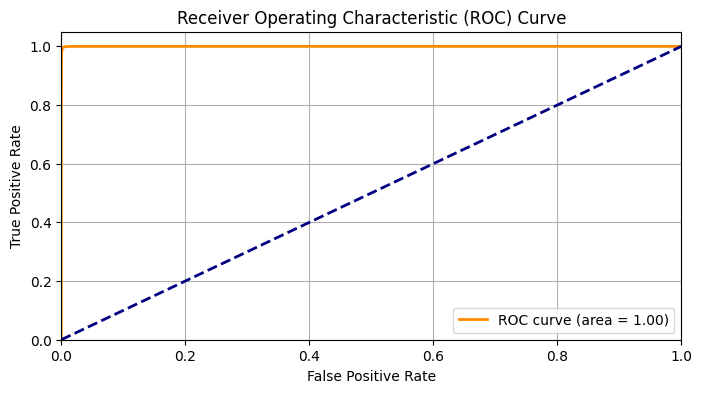

In [58]:
y_pred_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = roc_auc_score(y_val, y_pred_prob)

plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


 Model Evaluation Analysis

Accuracy
- **Accuracy**: 99.66%
  - Indicates that the model correctly predicts the vast majority of transactions.

Precision, Recall, F1-Score
* Class 0 (Non-Fraudulent)
- **Precision**: 1.00
- **Recall**: 0.99
- **F1-Score**: 1.00
  - Very high metrics indicate effective identification of non-fraudulent transactions.

* Class 1 (Fraudulent)
- **Precision**: 0.99
- **Recall**: 1.00
- **F1-Score**: 1.00
  - Very high metrics indicate effective identification of fraudulent transactions.

* Confusion Matrix
- **True Negatives**: 255,876
- **False Positives**: 1,310
- **False Negatives**: 432
- **True Positives**: 258,050
  - Few errors with minimal false positives and negatives.

* ROC-AUC Score
- **ROC-AUC Score**: 0.9966
  - Close to 1, indicating excellent performance in distinguishing between fraudulent and non-fraudulent transactions.

### Conclusion
- High accuracy, precision, recall, and F1-score for both classes.
- Low misclassification rates and a near-perfect ROC-AUC score.



Saving the RandomForest Classifier:

In [60]:
import joblib
joblib.dump(model, 'credit_card_fraud_detection_model_v1.pkl')


['credit_card_fraud_detection_model_v1.pkl']